rdkit – библиотека для работы с химическими данными.

# Проект по предсказанию токсичности соединений
Что нужно сделать:


1. Проанализировать данные, + за визуализацию
2. Предобработать данные, чтобы улучшить качество модели. + за инсайты, если что-то найдется
3. Обучить модель и провалидировать ее. Метрика: RMSE
4. Проверить модель на test данных и прислать результаты вместе с ноутбуком

In [174]:
!pip3 install rdkit


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [175]:
import pandas as pd
import numpy as np

In [176]:
train = pd.read_csv("data/train.csv")

In [177]:
train.head(30)

,SMILES,activity
0,OCC=C,5.0
1,CO/N=C(/C(=O)OC)\C1=C(COC2=C(C)C=CC=C2)C=CC=C1,94.0
2,COC(=O)NS(=O)(=O)C1=CC=C(N)C=C1,5.4
3,CCCCC(CC)C(O)=O,-8.2
4,COC(=O)C1=C(CC(C)C)C(C2=NCCS2)=C(N=C1C(F)F)C(F...,26.2
5,CCC(C)(C)C1=CC=C(O)C=C1,91.2
6,CCCCOC(=O)[C@@H](C)OC1=CC=C(OC2=C(F)C=C(C=C2)C...,51.1
7,O[C@@H]1[C@H](CC2=CC=CC(=C2)C(O)=O)COC3=C1C=C(...,64.6
8,OC1=C(CC2=C(O)C=CC=C2)C=CC=C1,100.9
9,CC(C)(C)C1=CC=C(S)C=C1,37.9


## Анализ данных

In [178]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMILES    759 non-null    object 
 1   activity  759 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [179]:
train.isna().sum()
#пропуски отсутствуют

SMILES      0
activity    0
dtype: int64

In [180]:
#проверим на дубликаты
train.duplicated().any()


False

In [181]:
train['SMILES'].value_counts()

SMILES
OCC=C                                                       1
C1OC1C2CCC3OC3C2                                            1
C[C@]12CC[C@H]3[C@@H](CCC4=C3C=CC(O)=C4)[C@@H]1CC[C@H]2O    1
NC(=O)C(Br)(Br)C#N                                          1
OC(=O)C1=CC=C(C=C1)[N+]([O-])=O                             1
                                                           ..
CCOC(=O)NC(=S)NC1=C(NC(=S)NC(=O)OCC)C=CC=C1                 1
CN(C)C1=CC=C(C=C1)/N=N/C2=C(C=CC=C2)C(O)=O                  1
CCCCCCCCC1=CC=C(O)C=C1                                      1
OC1=C(Cl)C=C(Cl)C=C1Cl                                      1
CCOC1=CC(OC2=CC=C(C=C2Cl)C(F)(F)F)=CC=C1[N+]([O-])=O        1
Name: count, Length: 759, dtype: int64

In [182]:
train['activity'].value_counts()

activity
13.4    6
11.3    5
6.3     5
10.1    5
98.4    4
       ..
80.7    1
18.7    1
8.0     1
62.6    1
59.8    1
Name: count, Length: 518, dtype: int64

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Распределение по токсичности химических веществ')

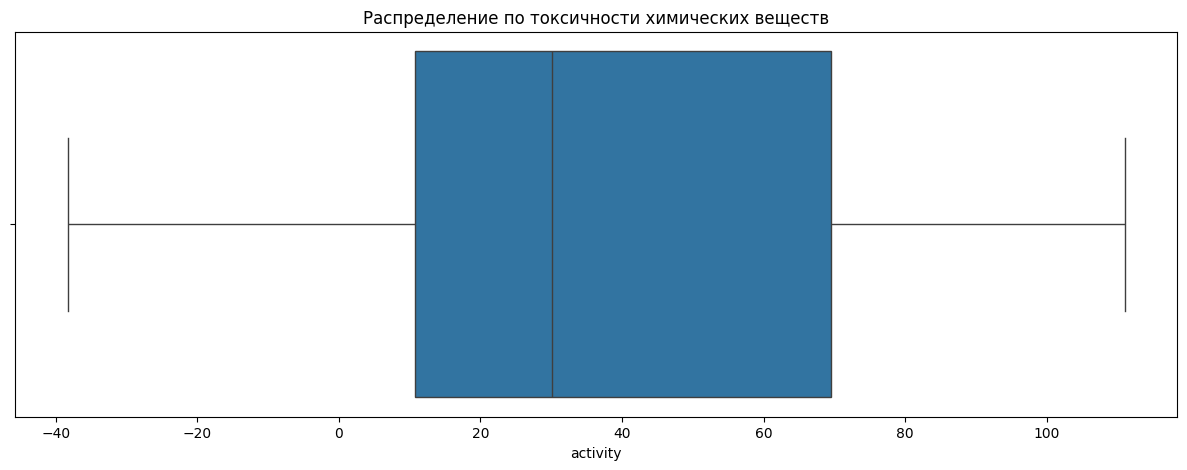

In [184]:
fig = plt.figure(figsize=(15,5))
diagram_box = sns.boxplot(
    data=train,
    x='activity',
    orient='h',
    width=0.9)
diagram_box.set_title('Распределение по токсичности химических веществ')

Text(0.5, 1.0, 'Гистограмма токсичности соединений')

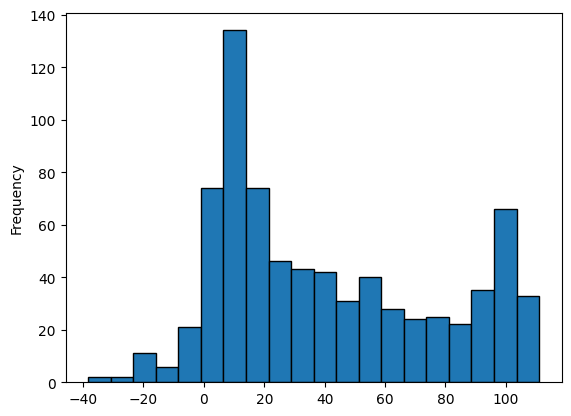

In [185]:
train['activity'].plot.hist(edgecolor='black', bins=20)
diagram_box.set_title('Гистограмма токсичности соединений')

In [186]:
#Видим что встречается отрицатеьная токсичность(немного странно)
#В интернете сказанно что такое существует

## Предобработка данных

In [187]:
from rdkit import Chem
from rdkit.Chem import AllChem

SMILES – это форма записи молекулы текстом. Модели не понимают текст (если мы не говорим о специальных моделях), поэтому текст нужно превратить в числа. Один из способов превратить молекулы в числа – это fingerprints.

In [188]:
def smiles_to_fp(smiles):
    '''Convert SMILES to Morgan fingerprints'''
    return np.array([AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(s), 2, nBits=1024) for s in smiles])

X_train = smiles_to_fp(train.SMILES)

[18:08:18] DEPRECATION WARNING: please use MorganGenerator
[18:08:18] DEPRECATION WARNING: please use MorganGenerator
[18:08:18] DEPRECATION WARNING: please use MorganGenerator
[18:08:18] DEPRECATION WARNING: please use MorganGenerator
[18:08:18] DEPRECATION WARNING: please use MorganGenerator
[18:08:18] DEPRECATION WARNING: please use MorganGenerator
[18:08:18] DEPRECATION WARNING: please use MorganGenerator
[18:08:18] DEPRECATION WARNING: please use MorganGenerator
[18:08:18] DEPRECATION WARNING: please use MorganGenerator
[18:08:18] DEPRECATION WARNING: please use MorganGenerator
[18:08:18] DEPRECATION WARNING: please use MorganGenerator
[18:08:18] DEPRECATION WARNING: please use MorganGenerator
[18:08:18] DEPRECATION WARNING: please use MorganGenerator
[18:08:18] DEPRECATION WARNING: please use MorganGenerator
[18:08:18] DEPRECATION WARNING: please use MorganGenerator
[18:08:18] DEPRECATION WARNING: please use MorganGenerator
[18:08:18] DEPRECATION WARNING: please use MorganGenerat

In [189]:
display(X_train)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [190]:
print(X_train.shape)

(759, 1024)


In [191]:
#Определяем таргет для обучения модели 
y = train['activity']

#Переведём X_train в формат DataFrame для удобной работы с признаками

In [192]:
X_train_pd = pd.DataFrame(X_train)

In [193]:
X_train_pd.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [194]:
#Разделим данные на тренировачные и на данные для валидации, т.к. они должны подвергаться предобработке и моделированию независимо от тренировочных
from sklearn.model_selection import train_test_split
TRAIN_SIZE = 0.8
X_train, X_val, y_train, y_val = train_test_split(X_train_pd, y, train_size=TRAIN_SIZE)

In [196]:
#Задаём функцию для поиска малоинформативных признаков
def find_low_informative_features(train):
    low_informative = []
    for i in X_train_pd.columns:
        proc = X_train_pd[i][X_train_pd[i] == 0].count() / X_train_pd.shape[0]
        if proc >= 0.9:
            low_informative.append(i)
        elif proc <= 0.1:
            low_informative.append(i)
    return low_informative

In [197]:
low_informative = find_low_informative_features(X_train)
print(len(low_informative))

986


In [198]:
#Большая часть признаков малоинформативна

In [199]:
#Удалим малоинформативные признаки
X_train_info = X_train.drop(columns=low_informative)

In [200]:
#После рааботы со столбцами вернём данные в формат массива
X_train_np = np.asarray(X_train_info)

In [201]:
print(X_train_np.shape)

(607, 38)


In [202]:
#Проведём сжатие размерности методом PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_np)

pca_data = pd.DataFrame(
    pca.transform(X_train_np),
    columns = [f'PC{i}' for i in range(1, pca.n_components_ + 1)]
    
)


In [203]:
pca_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38
0,-0.821208,0.804816,-1.788567,-0.438239,0.033973,0.000334,0.863011,-0.747830,-0.679679,0.324124,...,-0.065770,0.038188,0.053513,0.007741,0.044359,-0.000281,0.053328,-0.032022,-0.039150,-0.005790
1,-0.005035,0.344605,-0.671427,0.323448,-0.233554,-0.231426,-0.931651,-0.115637,0.116962,-0.340510,...,0.039796,-0.023566,0.014189,0.069646,0.035243,0.143028,-0.116307,-0.053135,0.004682,-0.005284
2,0.126926,-1.064964,-0.077471,0.451755,0.432544,0.370684,-0.576175,-0.023622,0.605656,0.413788,...,-0.007738,-0.211241,0.310125,0.076022,0.056336,-0.244487,-0.071226,-0.240826,-0.494994,-0.063250
3,-0.597284,-1.296530,0.332905,-0.027401,0.831237,-0.291438,0.740443,0.483965,-0.838478,-0.556347,...,0.119445,0.041082,0.041523,-0.010335,0.083511,-0.095471,0.084211,-0.040078,0.072163,0.040734
4,-0.779660,-0.717626,0.437432,-0.189884,-0.323660,0.118859,-0.669467,0.789148,0.011689,0.026636,...,0.302658,-0.266335,-0.233268,-0.374048,-0.018361,0.017627,-0.285158,-0.153057,0.112291,-0.028376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,0.983868,0.089126,-0.519145,-1.110936,-0.237073,-0.263284,0.578900,0.361275,-0.595931,-0.397940,...,0.024204,-0.183437,0.112778,-0.086925,0.067769,0.029253,0.099727,0.004665,0.067106,0.039387
603,-1.997736,0.033589,-1.181882,-0.530726,0.136113,0.201063,0.636173,-0.343171,-0.143463,0.260735,...,-0.022274,0.078103,0.010920,0.073763,0.090948,-0.059515,0.014807,-0.013976,0.008321,0.000708
604,0.928369,-0.319743,-0.683009,1.207688,-0.945986,1.252133,0.021831,1.002143,-0.156812,-0.159986,...,0.084891,-0.340452,0.080971,-0.272166,0.098484,0.141843,-0.216970,-0.187521,0.132113,-0.039796
605,-0.526936,-0.531909,0.988883,-0.317748,0.041460,0.012810,-0.254914,-0.758667,0.325537,0.316009,...,-0.139828,0.037745,0.211264,-0.163941,0.103871,0.066725,-0.024628,0.030217,0.077016,0.018798


In [204]:
#Нам нужны столбцы которые образуют 90% дисперсии
pca.explained_variance_ratio_

array([0.17381045, 0.11487251, 0.08115861, 0.06365812, 0.05789718,
       0.04985394, 0.04481506, 0.04003676, 0.03470616, 0.03100648,
       0.02702222, 0.02638136, 0.02467799, 0.02132056, 0.02030736,
       0.01886562, 0.01592123, 0.01514697, 0.01435415, 0.01189833,
       0.01143323, 0.01108101, 0.01033275, 0.00876929, 0.00774433,
       0.00751753, 0.00695601, 0.00628288, 0.00612291, 0.00589321,
       0.00567083, 0.00477453, 0.00434941, 0.00411501, 0.00376194,
       0.00311648, 0.00287932, 0.00148825])

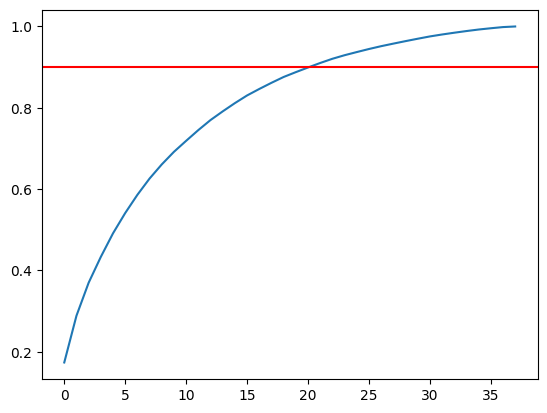

In [205]:
#Построим "Диаграмму локтя" который отображает кореляцию дисперсии и главных компонент
fig, ax = plt.subplots()

ax.plot(np.arange(0, 38), pca.explained_variance_ratio_.cumsum())
#Наносим прямую которая отображает 0.9 от дисперсии
ax.axhline(0.9, color='red')

In [206]:
#Оставляем 21 столбец
new_list = list(range(22,39))
list_to_drop = []
for i in new_list:
    i = 'PC' + str(i)
    list_to_drop.append(i)
    
pca_train = pca_data.drop(columns=list_to_drop)

 Прдобработка валидационных данных

In [207]:
#Совершаем те же манипуляции что совершали для тренировочных данных после векторизации

In [208]:
X_val.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
388,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
751,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
417,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
400,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
394,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [209]:
print(X_val.shape)

(152, 1024)


In [210]:
#В cписке low_informative лежат названия столбцов которые не информотивны искодя из тренировочной выборки
#Удалим малоинформативные признаки из тестовой выборки
X_val_info = X_val.drop(columns=low_informative)

In [211]:
#После рааботы со столбцами вернём данные в формат массива
X_val_np = np.asarray(X_val_info)

In [212]:
#Проведём сжатие размерности методом PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_val_np)

pca_val_data = pd.DataFrame(
    pca.transform(X_val_np),
    columns = [f'PC{i}' for i in range(1, pca.n_components_ + 1)]
    
)


In [213]:
#Оставляем 21 столбец как в тренировочной выборке
new_list = list(range(22,39))
list_to_drop = []
for i in new_list:
    i = 'PC' + str(i)
    list_to_drop.append(i)
    
pca_val = pca_val_data.drop(columns=list_to_drop)

In [214]:
#Тренировачные и валидационные данные готовы к моделированию

## Обучение модели

In [215]:
from sklearn.ensemble import RandomForestRegressor


In [216]:
model = RandomForestRegressor(random_state=42)
model.fit(pca_train, y_train)

RandomForestRegressor(random_state=42)

In [217]:
train_predicted = model.predict(pca_train)

In [218]:
train_predicted

array([ 95.38451457,  88.19185   ,  33.80783333,  15.3895    ,
        21.85416667,  38.31208333,  20.26363333,  27.02783333,
        15.175925  ,  53.09091667,   7.7785    ,  39.327     ,
        57.21331667,  13.33536667,  13.2365    ,  15.5255    ,
       101.6399123 ,  10.949     ,  56.08525   ,  14.1435    ,
        21.09      ,  13.09228333,  67.56758333,  23.4115    ,
        15.74483333,  39.8507619 ,  64.163     ,  41.90652381,
        17.11423532,  10.107     ,  83.3392619 ,  84.618     ,
        71.2475    ,  41.501     ,  27.86475   ,  23.97666667,
        70.8174    ,  88.82033333,  27.9175    ,   7.31285   ,
        39.28766667,  82.06535   ,  73.199     ,  96.7057    ,
        56.7915    ,  87.20087857,  31.88175   ,  60.97946667,
        22.422     ,  19.44125   ,  32.95593889,  13.94904762,
         1.82929167,  14.24596667,  94.49845   ,  41.52322619,
        33.28005833,  20.62825   ,  96.74383333,  50.13383333,
        40.442     ,  18.078     ,  84.421     ,  17.11

## Валидация

In [219]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

In [220]:
#Предскажем target для валидационных данных чтобы выявить переобучение/недообучение
val_predicted = model.predict(pca_val)

In [221]:
#Проведём метрики оценки качеества методом RMSE для тренировочной и валидационной выборки
print('RMSE train',  root_mean_squared_error(y_train, train_predicted))
print('RMSE train',  root_mean_squared_error(y_val, val_predicted))

RMSE train 12.9520141352983
RMSE train 35.84881489704357


Видим существенное различие:
В тренировочных данных RMSE гораздо ниже чем в валидационных, этто свидетельствует о переобучении модели

In [222]:
#Нам нужно применить метод обрезки деревьев(уменьшить глубину дерева) и подобрать подхоодящие гиперпараметры

In [223]:
print('Current depth:', model.get_params())

Current depth: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [224]:
# Определяем сетку гиперпараметров
param_grid = {
  'n_estimators': [50, 100, 200],
  'max_depth': [None, 10, 20],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4]
}

In [225]:
#Используем метод GridSearchCV чтобы получить наилучшие параметры для модели используя тренировачные данные
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(), 
                                                      param_grid=param_grid) 
grid_search.fit(pca_train, y_train) 
print(grid_search.best_estimator_)

RandomForestRegressor(max_depth=20, min_samples_leaf=4, n_estimators=50)


In [226]:
#Передадим полученные данные нашей модели и заново обучим её
model = RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=5)
model.fit(pca_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=5)

In [227]:
#Снова предскажем target для тренировачных и валидационных данных
val_predicted = model.predict(pca_val)
train_predicted = model.predict(pca_train)

In [228]:
#Снова проведём метрику RMSE
print('RMSE train',  root_mean_squared_error(y_train, train_predicted))
print('RMSE val',  root_mean_squared_error(y_val, val_predicted))

RMSE train 17.526632237675738
RMSE val 36.2127598510953


Видим что результаты не сильно изменились, попробуем другой метод для поиска гиперпараметров

In [229]:
#Используем метод RandomizedSearchCV чтобы получить наилучшие параметры для модели используя тренировачные данные
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(RandomForestRegressor(), 
                                   param_grid) 
random_search.fit(pca_train, y_train) 
print(random_search.best_estimator_)

RandomForestRegressor(max_depth=10, n_estimators=200)


In [230]:
#Передадим полученные данные нашей модели и заново обучим её
model = RandomForestRegressor(min_samples_leaf=4, min_samples_split=5, n_estimators=200)
model.fit(pca_train, y_train)

RandomForestRegressor(min_samples_leaf=4, min_samples_split=5, n_estimators=200)

In [231]:
#Снова предскажем target для тренировачных и валидационных данных
val_predicted = model.predict(pca_val)
train_predicted = model.predict(pca_train)

In [232]:
#Снова проведём метрику RMSE
print('RMSE train',  root_mean_squared_error(y_train, train_predicted))
print('RMSE val',  root_mean_squared_error(y_val, val_predicted))

RMSE train 17.318701003115176
RMSE val 36.47312607071312


Используем метод построения графика кривой обучения

In [233]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve

In [234]:
#Создаём объект кросс-валидатора k-fold со стратификацией
skf = StratifiedKFold(n_splits=5)
 
#Вычисляем координаты для построения кривой обучения
train_sizes, train_scores, valid_scores = learning_curve(
  model, pca_train, y_train, cv=5, scoring='neg_mean_squared_error', # правильный скоринг
  train_sizes=np.linspace(0.1, 1.0, 10)
)
print('Train sizes: \n', train_sizes)
print('Train scores: \n', train_scores)
print('Valid scores: \n', valid_scores)

Train sizes: 
 [ 48  97 145 194 242 291 339 388 436 485]
Train scores: 
 [[-465.22663886 -541.97943252 -530.85904552 -554.60222604 -547.40456848]
 [-362.77363879 -410.17389076 -400.72384266 -395.79697355 -401.88150944]
 [-342.58229851 -355.1410637  -361.15203675 -357.42164444 -354.09627874]
 [-309.5441903  -340.43414635 -351.25123552 -344.10241278 -342.53684675]
 [-309.57057995 -318.49337372 -307.92359645 -311.70795792 -310.87390341]
 [-294.82226828 -324.7733339  -313.99805938 -314.2757472  -305.56517992]
 [-312.94309369 -328.123693   -321.49816643 -305.62328793 -308.62668162]
 [-306.82166122 -316.64760906 -304.26618867 -289.45280622 -306.08735502]
 [-297.56937509 -300.8563499  -304.87104812 -289.14894637 -300.77452983]
 [-296.93887351 -305.30381534 -315.11130104 -298.88052075 -303.06518586]]
Valid scores: 
 [[-1377.93425772 -1199.08502469 -1183.35080007 -1357.20886749
  -1080.51489296]
 [-1371.65437456  -954.52799713  -981.71251177 -1303.35213219
   -892.16138587]
 [-1264.34857527 -10

In [235]:
#Считаем среднее по столбцам полученных матриц
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = -np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

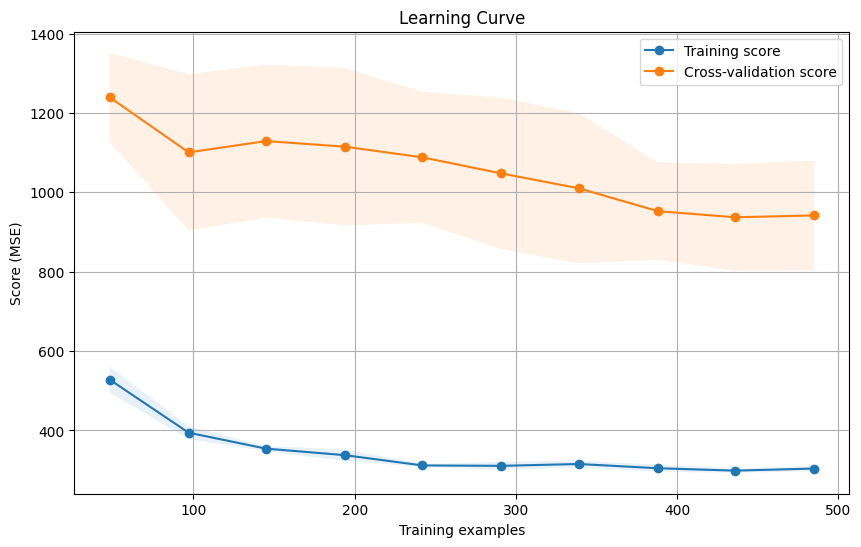

In [236]:
#Cтроим график
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score (MSE)")

plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
         train_scores_mean + train_scores_std, alpha=0.1)

plt.plot(train_sizes, valid_scores_mean, 'o-', label="Cross-validation score")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
         valid_scores_mean + valid_scores_std, alpha=0.1)

plt.legend(loc="best")
plt.grid()
plt.show()

In [237]:
#Благодаря кривой обучения мы убедились что это переобучения(кривые на большом растоянии друг от друга)

# Вывод: модель является производительной, но исходя из валидации данных точность предсказания недостаточна из-за переобучения модели
# Методы понижения размерности и гиперпараметров не оказали сильного влияния на метрики качества, значит проблема кроется в структуре данных

In [238]:
#Чтобы модель не привыкала к тренировачным данным попробуем передать ей большее количество данных
#Обучим её без применения метода PCA(без снижения размерности)

In [239]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train_np, y_train)

RandomForestRegressor(random_state=42)

In [240]:
train_predicted = model.predict(X_train_np)
val_predicted = model.predict(X_val_np)

In [241]:
#Снова проведём метрику RMSE
print('RMSE train',  root_mean_squared_error(y_train, train_predicted))
print('RMSE val',  root_mean_squared_error(y_val, val_predicted))

RMSE train 12.97847803495728
RMSE val 29.73176291496398


Видим улучшение метрики качества

In [242]:
#СНОВА используем метод RandomizedSearchCV чтобы получить наилучшие параметры для модели используя тренировачные данные 
#БЕЗ ОБРАБОТКИ МЕТОДОМ PCA
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(RandomForestRegressor(), 
                                   param_grid) 
random_search.fit(X_train_np, y_train) 
print(random_search.best_estimator_)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=200)


In [243]:
#Передадим полученные данные нашей модели и заново обучим её
model = RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=5)
model.fit(X_train_np, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=5)

In [244]:
#Снова предскажем target для тренировачных и валидационных данных
train_predicted = model.predict(X_train_np)
val_predicted = model.predict(X_val_np)

In [245]:
#Снова проведём метрику RMSE
print('RMSE train',  root_mean_squared_error(y_train, train_predicted))
print('RMSE val',  root_mean_squared_error(y_val, val_predicted))

RMSE train 23.167049039900533
RMSE val 30.024629813076082


Снова наблюдаем улучшение метрик
Попробуем снова построить кривые обучения

In [246]:
#Создаём объект кросс-валидатора k-fold со стратификацией
skf = StratifiedKFold(n_splits=5)
 
#Вычисляем координаты для построения кривой обучения
train_sizes, train_scores, valid_scores = learning_curve(
  model, X_train_np, y_train, cv=5, scoring='neg_mean_squared_error', # правильный скоринг
  train_sizes=np.linspace(0.1, 1.0, 10)
)
print('Train sizes: \n', train_sizes)
print('Train scores: \n', train_scores)
print('Valid scores: \n', valid_scores)

Train sizes: 
 [ 48  97 145 194 242 291 339 388 436 485]
Train scores: 
 [[-760.54782465 -796.72519688 -790.36379137 -792.97559251 -837.41506306]
 [-554.69410939 -725.06614314 -721.20153555 -717.15362122 -727.44460468]
 [-541.8283312  -668.84393758 -629.84918631 -643.90693702 -614.48807238]
 [-479.51402044 -630.22135154 -613.2088439  -617.89283485 -612.54569344]
 [-474.74624032 -600.53777403 -557.57317005 -544.56239492 -552.65806855]
 [-473.03974837 -590.95086586 -594.08035016 -550.52307271 -552.70679537]
 [-493.24813437 -603.20381973 -600.35136417 -535.32157096 -530.69333585]
 [-486.07871192 -572.0949663  -567.23873001 -515.35600153 -535.85749981]
 [-483.20546091 -552.39042931 -561.33981219 -502.56145842 -532.78981509]
 [-489.35700652 -553.94388597 -560.03847152 -525.24999854 -542.43732512]]
Valid scores: 
 [[-1288.08601046 -1078.19549482 -1098.53852849 -1200.59868281
   -919.35543267]
 [-1359.45058591  -844.35534828  -910.49815087 -1155.87816509
   -871.19383866]
 [-1242.57391397  -8

In [247]:
#Считаем среднее по столбцам полученных матриц
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = -np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

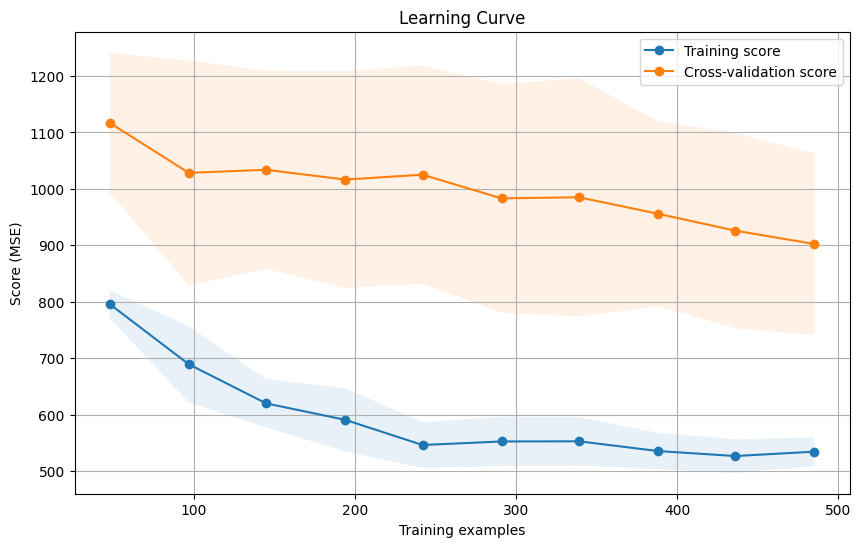

In [248]:
#Cтроим график
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score (MSE)")

plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
         train_scores_mean + train_scores_std, alpha=0.1)

plt.plot(train_sizes, valid_scores_mean, 'o-', label="Cross-validation score")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
         valid_scores_mean + valid_scores_std, alpha=0.1)

plt.legend(loc="best")
plt.grid()
plt.show()

## Предсказание для тестовой выборки(без target)

In [249]:
#Предобработка для тестовых данных

In [250]:
test = pd.read_csv("data/test_only_smiles.csv")


In [251]:
test.head()


,Unnamed: 0,SMILES
0,0,CC(O)CCO
1,1,CCCCOCCOC(=O)COC1=C(Cl)C=C(Cl)C=C1
2,2,CO/N=C(/C1=NOCCO1)\C2=C(OC3=NC=NC(OC4=CC=CC=C4...
3,3,C=CC(=O)NCNC(=O)C=C
4,4,CC1=CC(=CC=C1)[N+]([O-])=O


In [252]:
#Удаляем столбец unnamed
test = test.drop(columns='Unnamed: 0')

In [253]:
#Используем функцию fingerprints на тестовой выборке
def smiles_to_fp(smiles):
    '''Convert SMILES to Morgan fingerprints'''
    return np.array([AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(s), 2, nBits=1024) for s in smiles])

X_test = smiles_to_fp(test.SMILES)

[18:19:04] DEPRECATION WARNING: please use MorganGenerator
[18:19:04] DEPRECATION WARNING: please use MorganGenerator
[18:19:04] DEPRECATION WARNING: please use MorganGenerator
[18:19:04] DEPRECATION WARNING: please use MorganGenerator
[18:19:04] DEPRECATION WARNING: please use MorganGenerator
[18:19:04] DEPRECATION WARNING: please use MorganGenerator
[18:19:04] DEPRECATION WARNING: please use MorganGenerator
[18:19:04] DEPRECATION WARNING: please use MorganGenerator
[18:19:04] DEPRECATION WARNING: please use MorganGenerator
[18:19:04] DEPRECATION WARNING: please use MorganGenerator
[18:19:04] DEPRECATION WARNING: please use MorganGenerator
[18:19:04] DEPRECATION WARNING: please use MorganGenerator
[18:19:04] DEPRECATION WARNING: please use MorganGenerator
[18:19:04] DEPRECATION WARNING: please use MorganGenerator
[18:19:04] DEPRECATION WARNING: please use MorganGenerator
[18:19:04] DEPRECATION WARNING: please use MorganGenerator
[18:19:04] DEPRECATION WARNING: please use MorganGenerat

In [254]:
print(X_test.shape)


(253, 1024)


In [255]:
#Переводим тестовую выборку в формат DataFrame для удобной работы
X_test = pd.DataFrame(X_test)

In [260]:
#В чписке low_informative лежат названия столбцов которые не информотивны искодя из тренировочной выборки
#Удалим малоинформативные признаки из тестовой выборки
X_test_info = X_test.drop(columns=low_informative)

In [263]:
#После рааботы со столбцами вернём данные в формат массива
X_test_np = np.asarray(X_test_info)

In [264]:
#Предскажем таргет для тестовой выборки используя финальную версию модели
test_predicted = model.predict(X_test_np)

In [ ]:
#Производительность высокая